# Regression Problem using Support Vector Regression (SVR)
# For Admission Prediction
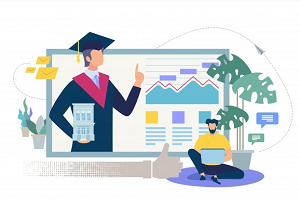 

### Importing libraries

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import metrics

#### Information about the dataset

The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :

- GRE Scores ( out of 340 )
- TOEFL Scores ( out of 120 )
- University Rating ( out of 5 )
- Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
- Undergraduate GPA ( out of 10 )
- Research Experience ( either 0 or 1 )
- Chance of Admit ( ranging from 0 to 1 )

## Data injection

In [91]:
data = pd.read_csv('https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv')

In [92]:
# Making a copy of the data

df = data.copy()

In [93]:
# Top 5 records

df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Data cleaning and Basic Operations

In [94]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

#### Trimming the space out of the column names

In [95]:
df.columns = [features.strip() for features in df.columns ]

In [96]:
# To get columns in list 

list(df.columns)

['Serial No.',
 'GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR',
 'CGPA',
 'Research',
 'Chance of Admit']

In [97]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


### Statistical Analysis

In [98]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


Observation :
- There are outliers in the lower side of "Chance of Admit"

#### Basic information about dataset

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


Observation :
- There is no null value, sign of a good dataset
- There are 5 features of int type and 4 features of float type.

### Analysis of : GRE Score (Graduate Record Examination) :

In [100]:
print(f"Lowest GRE score : {df['GRE Score'].min()}")
print(f"Highest GRE score : {df['GRE Score'].max()}")

Lowest GRE score : 290
Highest GRE score : 340


#### Students with Lowest GRE score  (290)

In [101]:
df[df['GRE Score'] == 290]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
117,118,290,104,4,2.0,2.5,7.46,0,0.45
377,378,290,100,1,1.5,2.0,7.56,0,0.47


Observation :
- Serial no. 118 and 378 has the Lowest GRE Score.

#### Students with highest GRE score (340)

In [102]:
df[df['GRE Score'] == 340]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
25,26,340,120,5,4.5,4.5,9.60,1,0.94
33,34,340,114,5,4.0,4.0,9.60,1,0.90
81,82,340,120,4,5.0,5.0,9.50,1,0.96
84,85,340,115,5,4.5,4.5,9.45,1,0.94
143,144,340,120,4,4.5,4.0,9.92,1,0.97
202,203,340,120,5,4.5,4.5,9.91,1,0.97
284,285,340,112,4,5.0,4.5,9.66,1,0.94
384,385,340,113,4,5.0,5.0,9.74,1,0.96
429,430,340,115,5,5.0,4.5,9.06,1,0.95


Observation :
- Serial no. 26, 34, 82, 85, 144, 203, 285, 385, 430 has the Highest GRE Score.

### Analysis of : TOEFL Score (Test of English as a Foreign Language) :

In [103]:
print(f"Lowest TOEFL score : {df['TOEFL Score'].min()}")
print(f"Highest TOEFL score : {df['TOEFL Score'].max()}")

Lowest TOEFL score : 92
Highest TOEFL score : 120


#### Students with lowest TOEFL Score

In [104]:
df[df['TOEFL Score'] == 92]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
368,369,298,92,1,2.0,2.0,7.88,0,0.51


Observation :
- Serial no. 369 has the lowest TOEFL score

#### Students with lowest TOEFL Score

In [105]:
df[df['TOEFL Score'] == 120]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
25,26,340,120,5,4.5,4.5,9.60,1,0.94
81,82,340,120,4,5.0,5.0,9.50,1,0.96
97,98,331,120,3,4.0,4.0,8.96,1,0.86
143,144,340,120,4,4.5,4.0,9.92,1,0.97
202,203,340,120,5,4.5,4.5,9.91,1,0.97
203,204,334,120,5,4.0,5.0,9.87,1,0.97
212,213,338,120,4,5.0,5.0,9.66,1,0.95
297,298,320,120,3,4.0,4.5,9.11,0,0.86
497,498,330,120,5,4.5,5.0,9.56,1,0.93


Observation :
- Serial no. 26, 82, 98, 144, 203, 204, 213, 298, 498 has the highest TOEFL score

### Analysis of : University Rating

In [106]:
df['University Rating'].unique()

array([4, 3, 2, 5, 1], dtype=int64)

Observation :
- We have 5 types of University Rating ranked from 1 to 5.

In [107]:
df['University Rating'].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64

Observation :
- Most universities get 3,2,4 rating
- Least universities in 1 & 5.

### Analysis : CGPA(Cumulative Grade Point Average)

In [108]:
print(f"The minimum CGPA is : {df['CGPA'].min()}")
print(f"The maximum CGPA is : {df['CGPA'].max()}")

The minimum CGPA is : 6.8
The maximum CGPA is : 9.92


#### Students with lowest CGPA

In [109]:
df[df['CGPA'] == 6.8]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
58,59,300,99,1,3.0,2.0,6.8,1,0.36


Observation :
- Serial No. 59 has the lowest CGPA.

#### Students with highest CGPA

In [110]:
df[df['CGPA'] == 9.92]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
143,144,340,120,4,4.5,4.0,9.92,1,0.97


Observation :
- Serial No. 144 has the highest CGPA.

### Analysis : Research

In [111]:
df['Research'].value_counts()

1    280
0    220
Name: Research, dtype: int64

Observation :
- There are 220 students who are not having Researcch Experiance.
- There are 280 students with Research Experiance

## Univariate Analysis

<AxesSubplot:xlabel='GRE Score'>

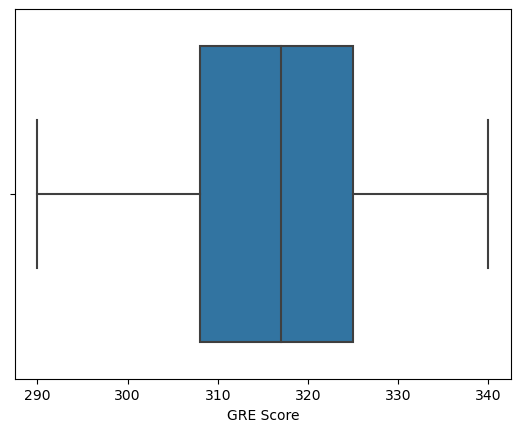

In [112]:
sns.boxplot(df['GRE Score'])

Observation :
- There is no outliers in the dataset

<AxesSubplot:xlabel='Chance of Admit'>

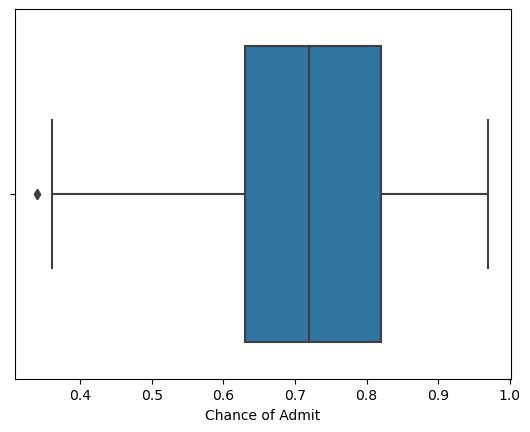

In [113]:
sns.boxplot(df['Chance of Admit'])

Observation :
- There is a outlier in the lower side of "Chance of Admit"

#### Countplot : To check binary classification in the features

<AxesSubplot:xlabel='Research', ylabel='count'>

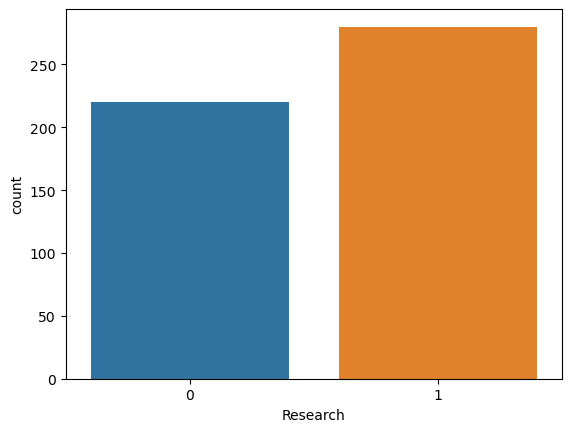

In [114]:
sns.countplot(df['Research'])

## Bivariate Analysis

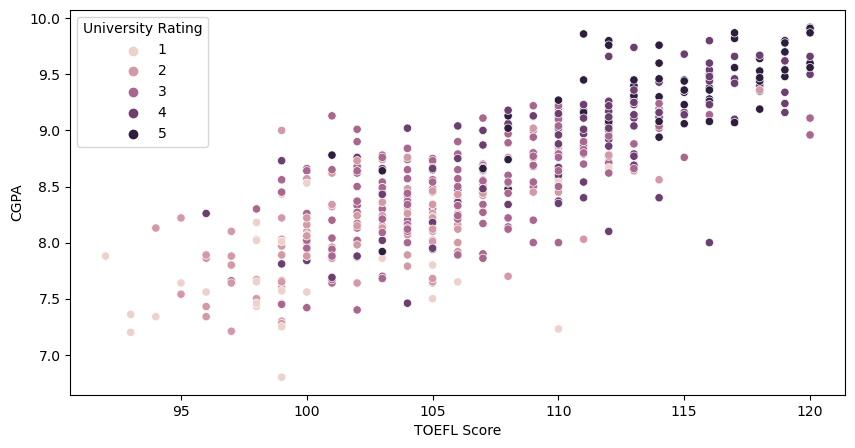

In [115]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='TOEFL Score', y='CGPA', hue='University Rating')
plt.show()

Observation :
- "TOEFL Score" and "CGPA" are positively correlated

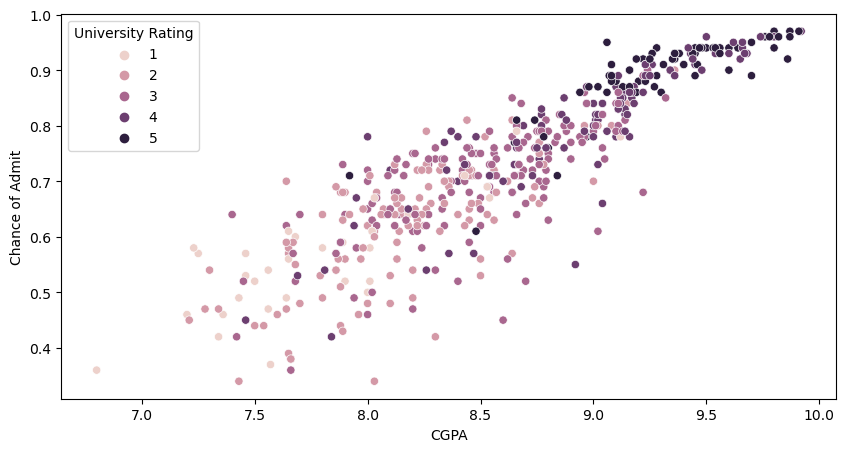

In [116]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='CGPA', y='Chance of Admit', hue='University Rating')
plt.show()

Observation :
- "TOEFL Score" and "CGPA" are positively correlated

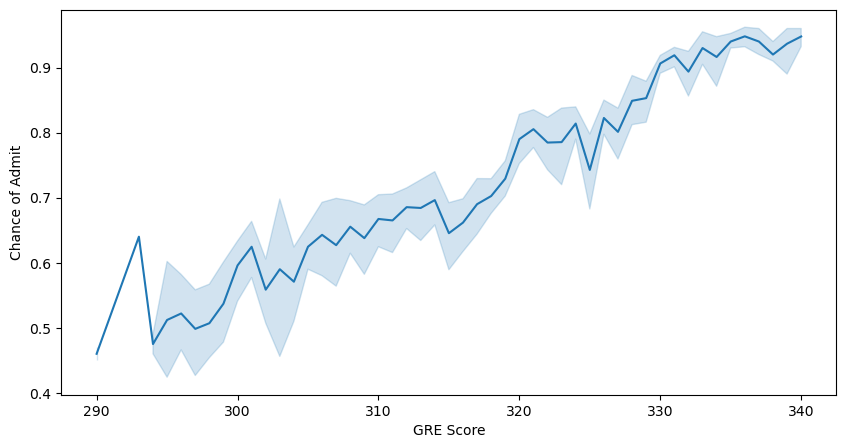

In [117]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='GRE Score', y='Chance of Admit')
#sns.lineplot(data=df, x='GRE Score', y='Chance of Admit', hue='University Rating')
plt.show()

Observation :
- "GRE Score" and "Chance of Admit" are positively correlated

#### Dist plot : To check the distribution

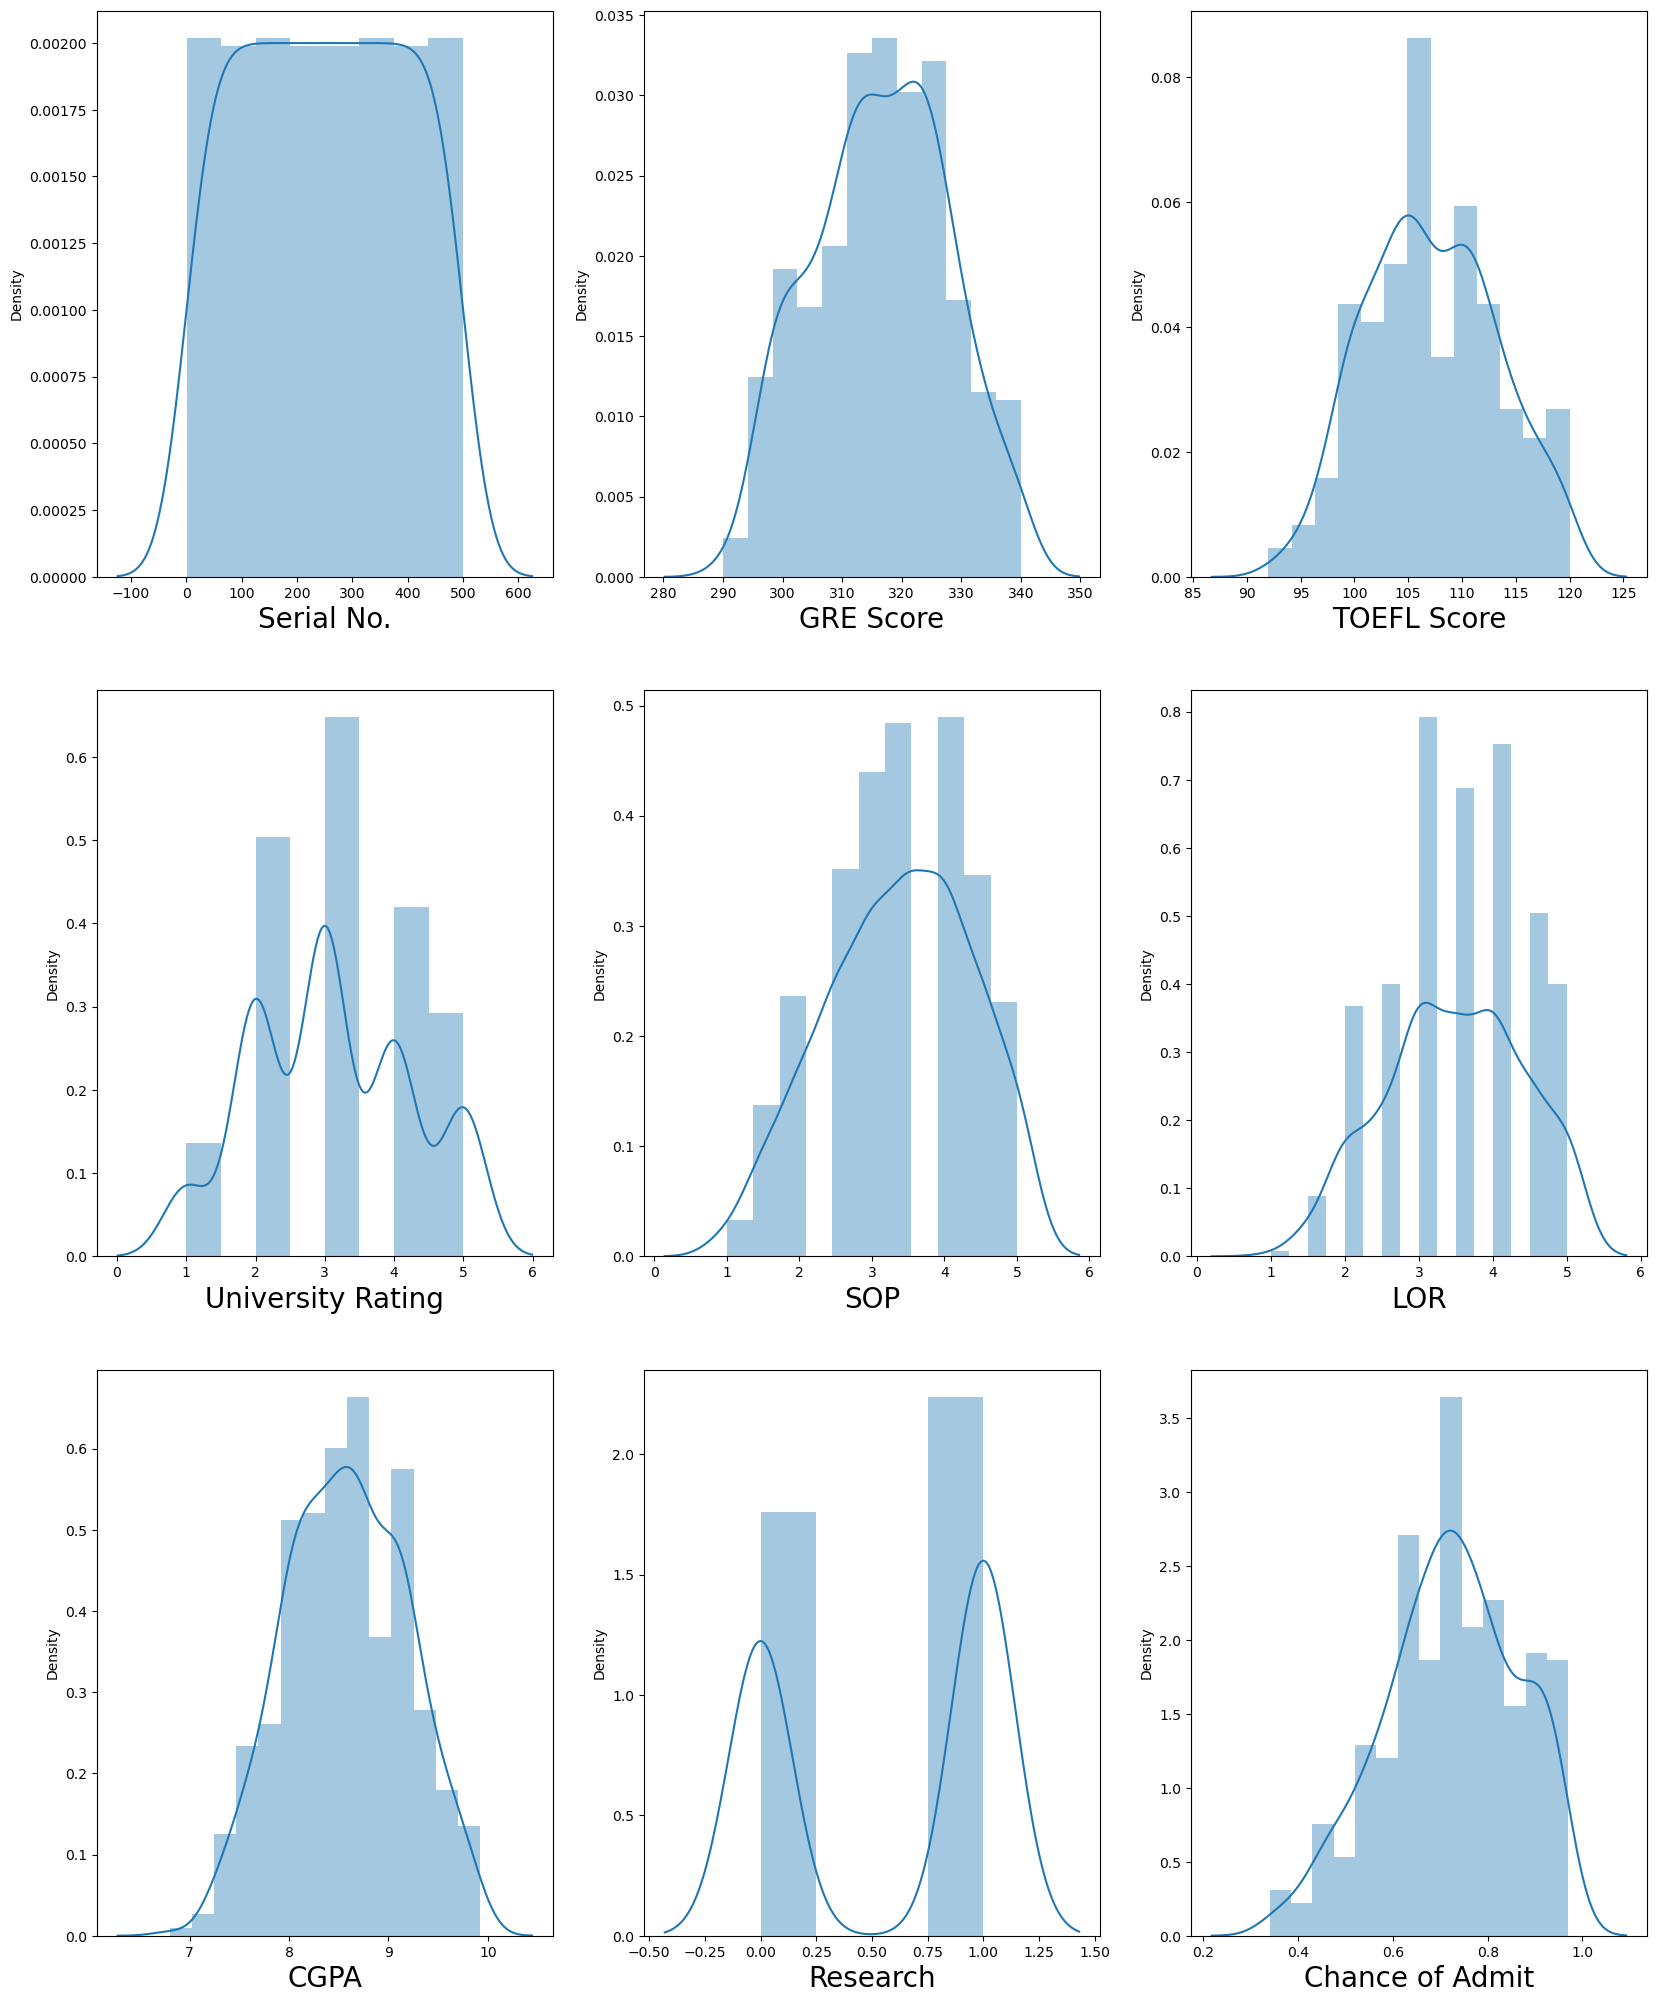

In [118]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for columns in df:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[columns])
        plt.xlabel(columns, fontsize=20)
    plotnumber+=1
plt.show()

Observation :
- "GRE Score", "CGPA" approx normally distributed.

#### Pair plot : To check the correlation in different plots

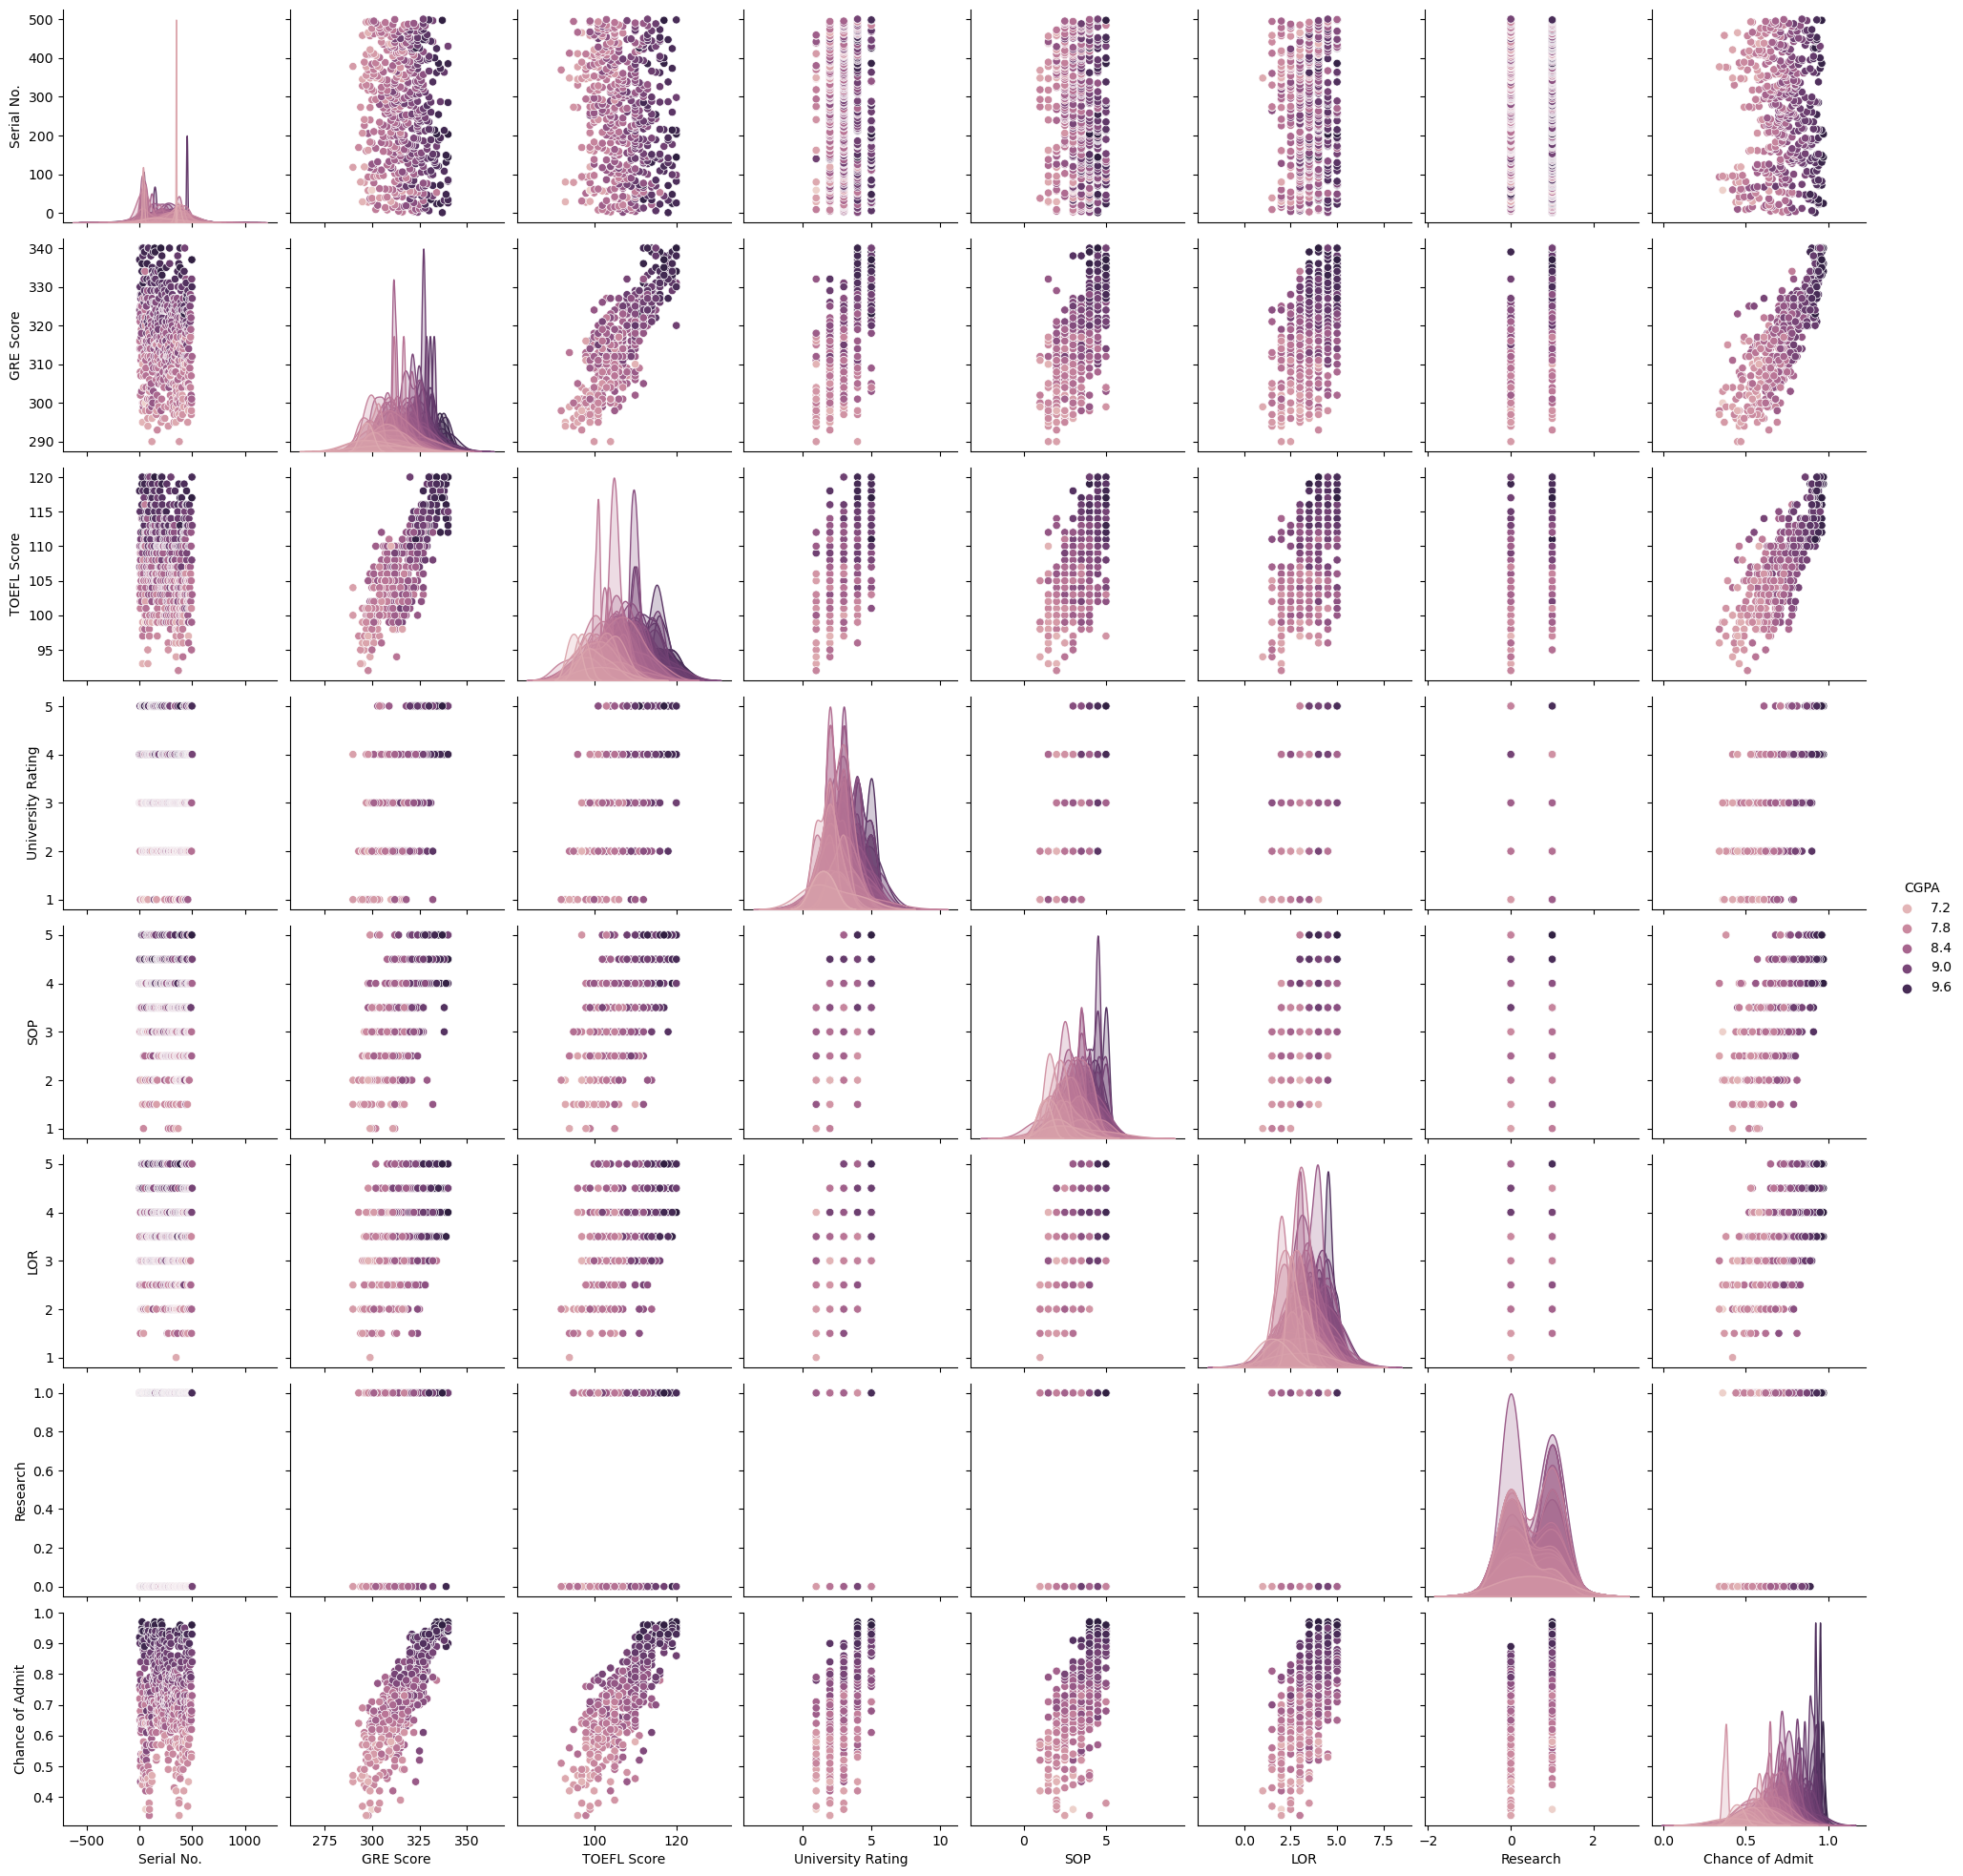

In [119]:
sns.pairplot(df, hue='CGPA')

Observation :
- "Chance of Admit" and "GRE Score" are positively correlated.
- "Chance of Admit" and "TOEFL Score" are positively correlated.
- "CGPA" and "GRE Score" are positively correlated.

In [120]:
# To check the correlation

df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


#### Heatmap : To check the correlation

<AxesSubplot:>

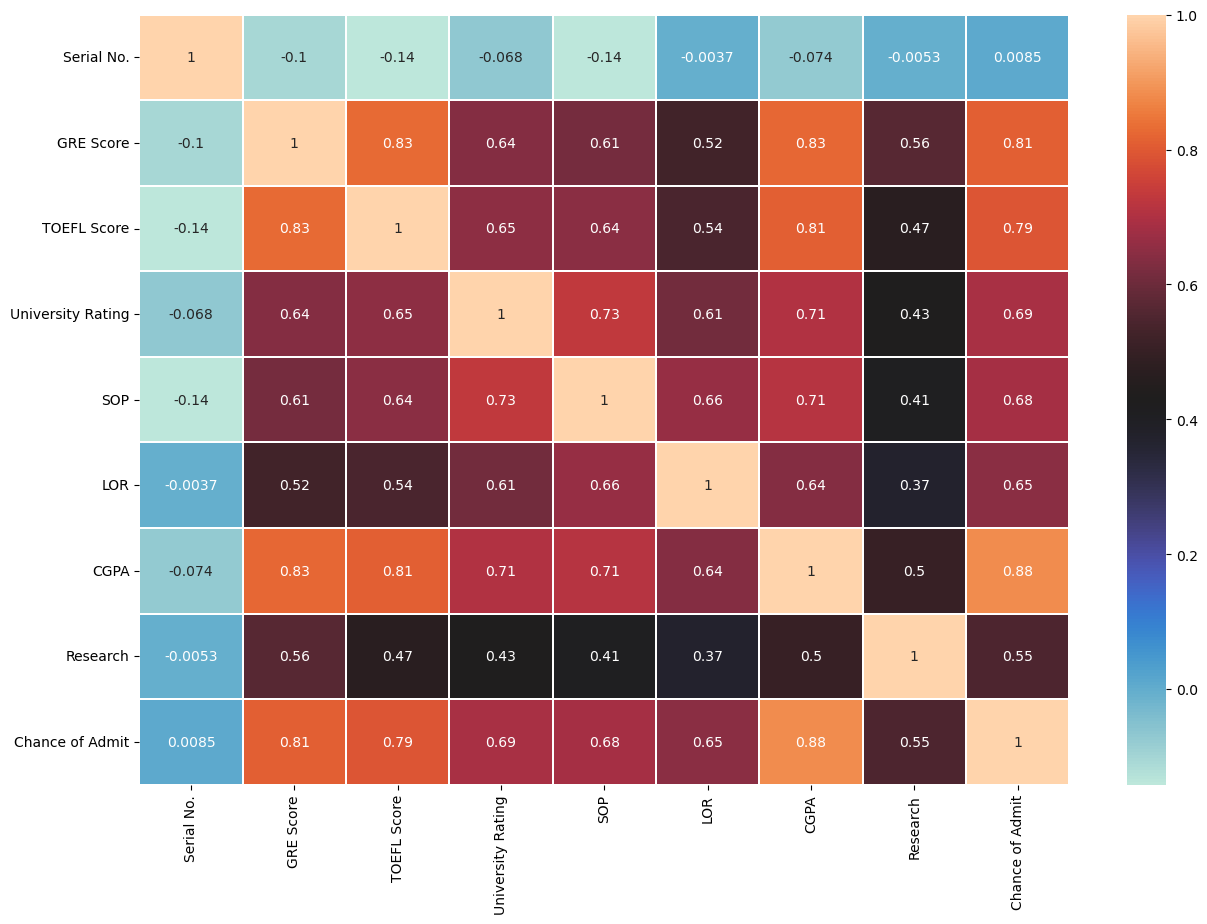

In [121]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='icefire', linewidths=0.2)

Observation :
- "Chance of Admit" and "GRE Score" are positively correlated.
- "CGPA" and "GRE Score" are positively correlated.

#### Segragating the Indepandent (Input) features and Depandent (Output) features

In [122]:
# Excluding "Serial No." and "Chance of Admit"

X = df.drop(['Chance of Admit', 'Serial No.'], axis=1)
#X= df.iloc[:7]
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [123]:
# Output label

y = df.iloc[:,-1]
#y = df['Chance of Admit']
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

### Splitting the data set

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=34)

In [125]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
162,318,109,3,3.0,3.0,8.50,0
266,312,105,2,2.0,2.5,8.45,0
237,329,114,5,4.5,5.0,9.19,1
170,312,101,2,2.5,3.5,8.04,1
441,332,112,1,1.5,3.0,8.66,1
...,...,...,...,...,...,...,...
246,316,105,3,3.0,3.5,8.73,0
361,334,116,4,4.0,3.5,9.54,1
490,307,105,2,2.5,4.5,8.12,1
122,310,106,4,1.5,2.5,8.36,0


### Scaling dataset

In [126]:
scaler = StandardScaler()

In [127]:
X_train_tf = scaler.fit_transform(X_train)
X_test_tf = scaler.transform(X_test)

In [128]:
X_train_tf 

array([[ 0.10279186,  0.25648925, -0.06756917, ..., -0.53704195,
        -0.14409646, -1.14470294],
       [-0.43247147, -0.42007689, -0.93817199, ..., -1.08057383,
        -0.22622017, -1.14470294],
       [ 1.08410798,  1.10219693,  1.67363646, ...,  1.63708557,
         0.9892107 ,  0.87358909],
       ...,
       [-0.87852425, -0.42007689, -0.93817199, ...,  1.09355369,
        -0.76823664,  0.87358909],
       [-0.61089259, -0.25093535,  0.80303364, ..., -1.08057383,
        -0.37404284, -1.14470294],
       [-0.07562925, -0.75835995, -0.06756917, ..., -1.62410571,
        -1.49092526, -1.14470294]])

In [129]:
X_test_tf

array([[ 0.01358131, -0.42007689, -0.06756917, ..., -0.53704195,
        -0.04554801, -1.14470294],
       [-0.25405036,  0.42563079, -0.06756917, ...,  0.55002181,
         0.34864578, -1.14470294],
       [ 1.70858188,  1.77876306,  1.67363646, ...,  0.55002181,
         0.9892107 ,  0.87358909],
       ...,
       [-0.07562925, -1.43492609, -0.93817199, ..., -0.53704195,
         0.67714061, -1.14470294],
       [ 0.19200242, -0.42007689, -0.06756917, ...,  0.00648993,
         0.13512414,  0.87358909],
       [-0.34326092, -0.75835995, -0.06756917, ...,  0.55002181,
         0.26652207, -1.14470294]])

In [130]:
y_train

162    0.67
266    0.72
237    0.86
170    0.68
441    0.79
       ... 
246    0.72
361    0.93
490    0.67
122    0.57
417    0.52
Name: Chance of Admit, Length: 335, dtype: float64

In [131]:
y_test

163    0.68
183    0.75
286    0.92
105    0.69
436    0.58
       ... 
330    0.80
470    0.87
251    0.70
381    0.73
220    0.76
Name: Chance of Admit, Length: 165, dtype: float64

### Model Building

In [132]:
model = SVR()

In [133]:
model.fit(X_train_tf, y_train)

SVR()

#### Checking the accuracy of the trained model

In [134]:
train_score = model.score(X_train_tf, y_train)
train_score

0.7721009747440072

In [135]:
round(train_score*100)
#round(train_score,2)*100

77

Observation :
- Trained model has 77% accuracy.

#### Saving to a pickle file

In [136]:
import pickle

with open('AdmissionSVR.pkl', 'wb') as f:
    pickle.dump(model,f)

#### Loading the pickle file for prediction

In [137]:
model_load = pickle.load(open('AdmissionSVR.pkl', 'rb'))

In [138]:
df[25:30]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
25,26,340,120,5,4.5,4.5,9.6,1,0.94
26,27,322,109,5,4.5,3.5,8.8,0,0.76
27,28,298,98,2,1.5,2.5,7.5,1,0.44
28,29,295,93,1,2.0,2.0,7.2,0,0.46
29,30,310,99,2,1.5,2.0,7.3,0,0.54


### Predicting the output

#### for single record

In [139]:
#Considering features : GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research

test1 = scaler.transform([[340,120,5,4.5,4.5,9.6,1]])
test2 = scaler.transform([[322,109,5,4.5,3.5,8.8,0]])

#### With loaded file

In [140]:
model_load.predict(test1)

array([0.88293351])

In [141]:
model_load.predict(test2)

array([0.69535227])

#### With model

In [142]:
model.predict(test1)

array([0.88293351])

In [143]:
model.predict(test2)

array([0.69535227])

Observation :
- Loaded file is working as expected

In [144]:
y_predict = model_load.predict(X_test_tf)
y_predict

array([0.63383741, 0.73306706, 0.87238269, 0.76885287, 0.61696652,
       0.64940631, 0.5755025 , 0.71717984, 0.59171458, 0.85668572,
       0.57491851, 0.8387514 , 0.56090966, 0.6888866 , 0.70823903,
       0.69749074, 0.88536061, 0.8575261 , 0.87786544, 0.72609033,
       0.86173817, 0.63617568, 0.58533328, 0.68368892, 0.55545634,
       0.84979021, 0.70638177, 0.82866004, 0.67714268, 0.75914993,
       0.76351998, 0.75298663, 0.74661349, 0.83472183, 0.60214469,
       0.79951849, 0.58235991, 0.51195502, 0.6693315 , 0.49652272,
       0.49887797, 0.6706874 , 0.83341617, 0.68424953, 0.59025796,
       0.68520805, 0.61959649, 0.7590664 , 0.66745637, 0.64901811,
       0.70770695, 0.76122164, 0.87802469, 0.7484442 , 0.62273134,
       0.87208561, 0.88495462, 0.56435432, 0.59820975, 0.7428523 ,
       0.68237249, 0.57924379, 0.51954782, 0.62569547, 0.49622665,
       0.87703575, 0.4851144 , 0.5063233 , 0.65440316, 0.88088486,
       0.71202071, 0.57069818, 0.48801319, 0.49455224, 0.68350

#### Accuracy of the model

In [145]:
# Using r-squared

score = r2_score(y_test, y_predict)
score

0.6973132698151201

In [146]:
round(score*100)

70

In [150]:
# N -->> NUmber of data points

X.shape[0]

500

In [153]:
# P  -->> Number of independent variables

X.shape[1]

7

In [147]:
## Using adjusted r-squared

adj_r2 = 1 - (1-score)*(X.shape[0]-1)/(X.shape[0]-X.shape[1]-1)
adj_r2

0.6930067512962295

In [148]:
round(adj_r2*100)

69

Observation :
It is a general model